<Figure size 432x288 with 0 Axes>

In [33]:
%matplotlib inline
%run ./formating.py
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
print(f"sklearn version : {sklearn.__version__}")

# just adding a comment
Project = 'spaceship-titanic'

#/kaggle/working
initial_directory = os.getcwd()
online = True if initial_directory=='/kaggle/working' else False
#/kaggle
parrent_directory = os.path.split(initial_directory)[0]
#whether we are working online or locally,os.path.join allows us to deal easily with 

train_file = os.path.join(parrent_directory,'input',Project,"train.csv")
test_file = os.path.join(parrent_directory,'input',Project,"test.csv")
print(train_file,"\n",test_file)

sklearn version : 1.0.2
C:\Users\qarna\Desktop\kaggle\input\spaceship-titanic\train.csv 
 C:\Users\qarna\Desktop\kaggle\input\spaceship-titanic\test.csv


In [2]:
data = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(exclude=['object']).columns

In [7]:
cat_cols

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [24]:
for col in cat_cols:
    print(col,"\n ",data[col].value_counts(),"\n")

PassengerId 
  0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64 

HomePlanet 
  Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64 

CryoSleep 
  False    5439
True     3037
Name: CryoSleep, dtype: int64 

Cabin 
  G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64 

Destination 
  TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64 

VIP 
  False    8291
True      199
Name: VIP, dtype: int64 

Name 
  Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1


In [25]:
cat_cols

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [9]:
num_cols

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

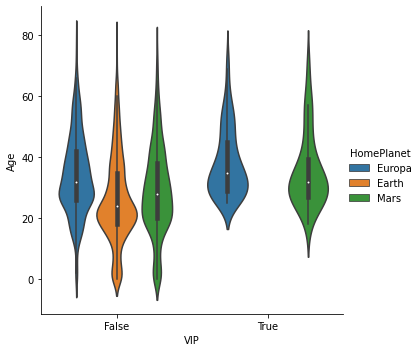

In [28]:
sns.catplot(data = data , x='VIP', y='Age',hue='HomePlanet',kind='violin')

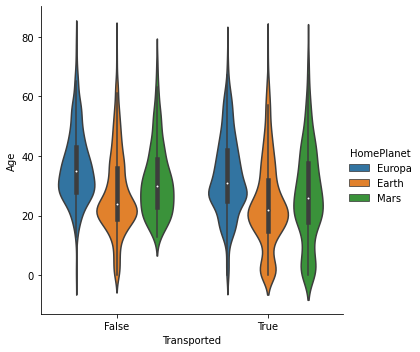

In [27]:
sns.catplot(data = data , x='Transported', y='Age',hue='HomePlanet',kind='violin')

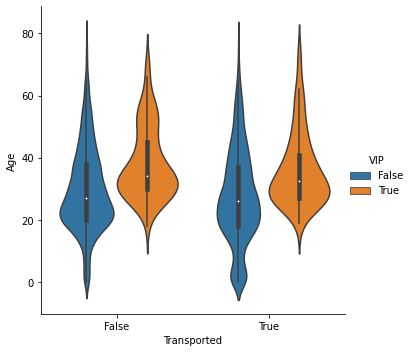

In [30]:
sns.catplot(data = data , x='Transported', y='Age',hue='VIP',kind='violin')

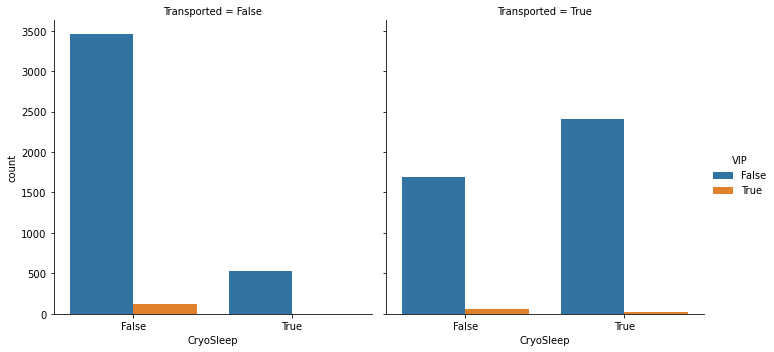

In [52]:
sns.catplot(data = data , x='CryoSleep',hue='VIP',col='Transported',kind='count')

In [57]:
data.groupby(['Transported']).count()#['CryoSleep'].count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,4315,4217,4204,4216,4225,4226,4216,4217,4231,4221,4223,4225,4216
True,4378,4275,4272,4278,4286,4288,4274,4295,4279,4264,4287,4280,4277


In [78]:
pd.DataFrame(data.groupby(['Transported','HomePlanet'])['PassengerId'].count())

PassengerId
Transported HomePlanet             
False       Earth              2651
            Europa              727
            Mars                839
True        Earth              1951
            Europa             1404
            Mars                920